In [ ]:
#!default_exp app

# IC Photography Styles III

## Setting Up Necessary Things

In [ ]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

## Necessary Imports

In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.5 MB/s eta 0:

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/(1) Artificial Intelligence/(1) Machine Learning/(8) End-to-end Data Science Pipeline in Practice/(8.5) Project

/content/drive/MyDrive/(1) Artificial Intelligence/(1) Machine Learning/(8) End-to-end Data Science Pipeline in Practice/(8.5) Project


In [ ]:
#!export
model = load_learner("models/pst_recognizer_v0.pkl")

In [ ]:
#!export
pst_labels = tuple(model.dls.vocab)
pst_labels

('Abstract Photography',
 'Architecture Photography',
 'Astrophotography',
 'Black and White Photography',
 'Documentary Photography',
 'Double Exposure Photography',
 'Event Photography',
 'Fashion Photography',
 'Fine Art Photography',
 'Flower Photography',
 'Food Photography',
 'Landscape Photography',
 'Macro Photography',
 'Pet Photography',
 'Portrait Photography',
 'Product Photography',
 'Real estate Photography',
 'Sports Photography',
 'Still Life Photography',
 'Storm Photography',
 'Street Photography',
 'Surreal Photography',
 'Underwater Photography',
 'Wedding Photography',
 'Wildlife Photography')

In [ ]:
#!export
def pst_recognizer(pst_image):
  pred, idx, probs = model.predict(pst_image)
  return dict(zip(pst_labels, map(float, probs)))

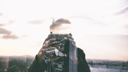

In [ ]:
img = PILImage.create("test_data/double_exposure_photography.jpg")
img.thumbnail((128, 128))
img

In [ ]:
pst_recognizer(img)

{'Abstract Photography': 0.00011631783854681998,
 'Architecture Photography': 0.00014726925292052329,
 'Astrophotography': 7.927899423521012e-05,
 'Black and White Photography': 0.014783135615289211,
 'Documentary Photography': 0.234914630651474,
 'Double Exposure Photography': 0.6806263327598572,
 'Event Photography': 0.000192491032066755,
 'Fashion Photography': 0.00020234448311384767,
 'Fine Art Photography': 0.004558913875371218,
 'Flower Photography': 1.4095621736487374e-05,
 'Food Photography': 0.00012813425564672798,
 'Landscape Photography': 0.0003476205747574568,
 'Macro Photography': 2.3426948700944195e-06,
 'Pet Photography': 4.449273910722695e-05,
 'Portrait Photography': 0.00015021685976535082,
 'Product Photography': 9.7107702458743e-05,
 'Real estate Photography': 1.9228873497922905e-05,
 'Sports Photography': 1.618849091755692e-05,
 'Still Life Photography': 3.759018727578223e-05,
 'Storm Photography': 0.0002115544630214572,
 'Street Photography': 0.006521353032439947,


In [ ]:
#!export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()

examples = [
    "test_data/architecture_photography.jpg",
    "test_data/double_exposure_photography.jpg",
    "test_data/food_photography.jpg",
    "test_data/landscape_photography.jpg",
    "test_data/portrait_photography.jpg",
    "test_data/street_photography.jpg"
]

iface = gr.Interface(fn=pst_recognizer, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e0251647628ef68514.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python SCript Export

In [ ]:
# from nbdev.export import notebook2script
# notebook2script('app.ipynb')